In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
ds, meta=tfds.load('citrus_leaves',with_info=True,split='train', shuffle_files=True)
ds=ds.batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/citrus_leaves/incomplete.FMAIZ4_0.1.2/citrus_leaves-train.tfrecord*...:   …

Dataset citrus_leaves downloaded and prepared to /root/tensorflow_datasets/citrus_leaves/0.1.2. Subsequent calls will reuse this data.


In [2]:
import matplotlib.pyplot as plt


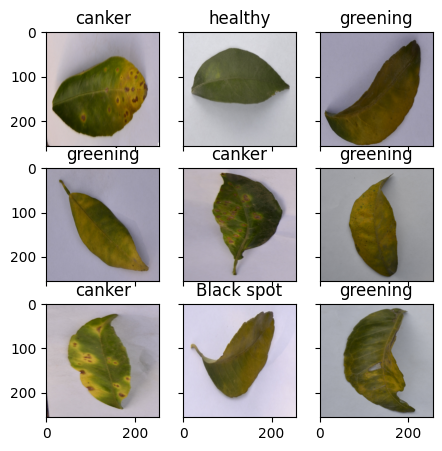

In [3]:
# Take one batch from dataset and display the images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5,5))

for sample in ds.take(1):
    images, labels = sample["image"], sample["label"]
    # print(labels)
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(meta.features['label'].int2str(labels[i*3+j]))
plt.show()

In [4]:
out_height, out_width = 128,256
resize = tf.keras.layers.Resizing(out_height, out_width)
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)

flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)

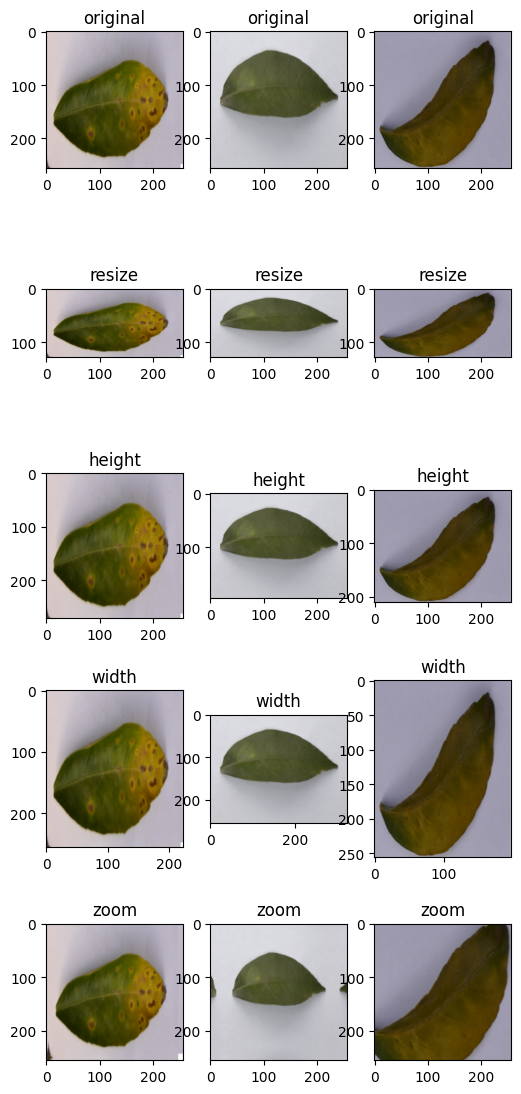

In [6]:
# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for sample in ds.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # height
        # Cast the image to float32 before applying RandomHeight
        ax[2][i].imshow(height(tf.cast(images[i], tf.float32)).numpy().astype("uint8"))
        ax[2][i].set_title("height")
        # width
        # Cast the image to float32 before applying RandomWidth
        ax[3][i].imshow(width(tf.cast(images[i], tf.float32)).numpy().astype("uint8"))
        ax[3][i].set_title("width")
        # zoom
        # Cast the image to float32 before applying RandomZoom
        ax[4][i].imshow(zoom(tf.cast(images[i], tf.float32)).numpy().astype("uint8"))
        ax[4][i].set_title("zoom")
plt.show()

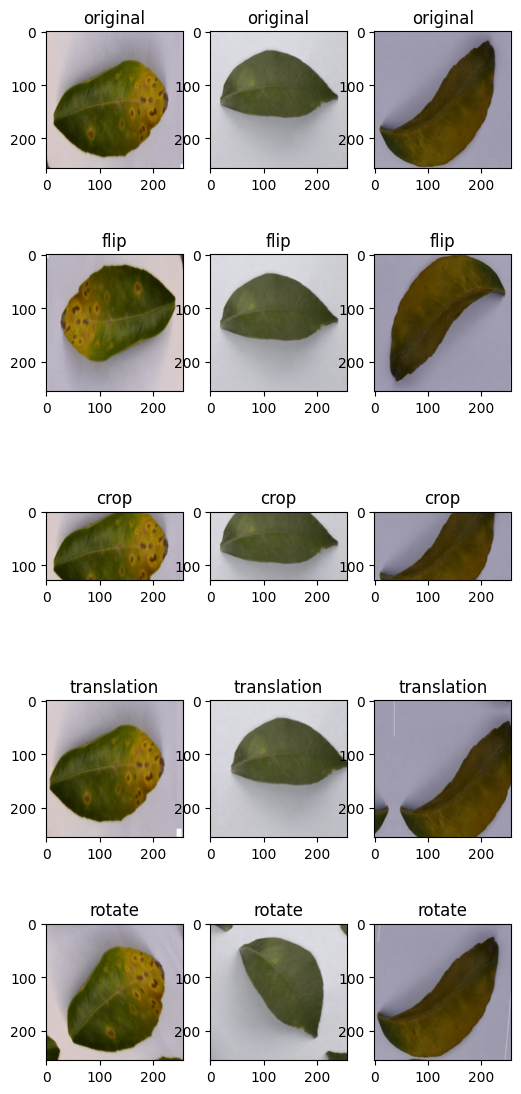

In [7]:
# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for sample in ds.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        ax[1][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("flip")
        # crop
        ax[2][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("crop")
        # translation
        ax[3][i].imshow(translation(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("translation")
        # rotate
        ax[4][i].imshow(rotate(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotate")
plt.show()

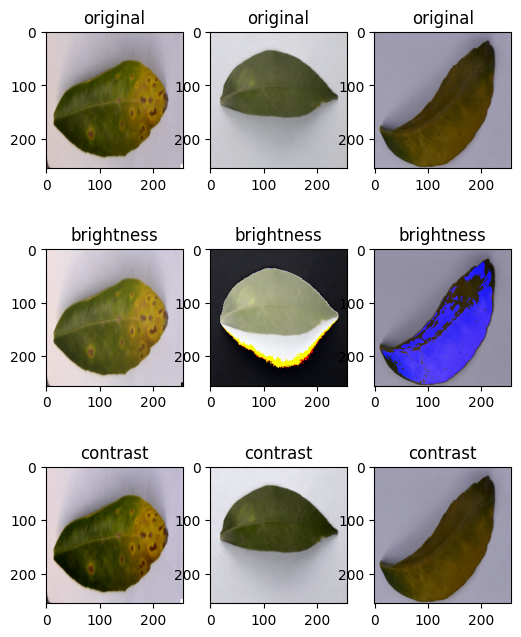

In [9]:
# Visualize images and augmentations
fig, ax = plt.subplots(3, 3, figsize=(6,8))
for sample in ds.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # brightness
        ax[1][i].imshow(brightness(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("brightness")
        # contrast
        # Cast the image to float32 before applying RandomContrast,
        # then cast back to uint8 for display
        ax[2][i].imshow(contrast(tf.cast(images[i], tf.float32)).numpy().astype("uint8"))
        ax[2][i].set_title("contrast")
plt.show()